In [1]:
import numpy as np
import pandas as pd

In [2]:
def calculate_target(x):
    b = np.array([[0.2], [-1.31], [-0.9], [0.3]]).reshape(4,-1)
    r1 = np.sum((x-b)**2 - 10 * np.cos(0.7*np.pi*(x+b)), axis=0)
    r2 = np.sum((x+b*2.1)**2 - 5 * np.cos(0.2*np.pi*(x+b*4)), axis=0)
    return 40 + r1 + r2

In [3]:
def create_dataset(dataset_size: int) -> pd.DataFrame:
  high_boundary = 7.4
  min_boundary = -7.4
  feature_size = 4
  df = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', 'target'])
  for _ in range(dataset_size):
    features = np.array([np.random.uniform(min_boundary, high_boundary) for _ in range(feature_size)])
    target = calculate_target(features.reshape(-1, 1))
    obj = [*features, *target]
    df.loc[len(df)] = obj
  return df

In [4]:
df = create_dataset(5000)

In [5]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [6]:
X, Y = df.drop(['target'], axis=1), df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [7]:
def add_sin(X):
  X_sin = np.sin(X)
  return np.concatenate([X, X_sin], axis=1)

In [8]:
p = make_pipeline(MinMaxScaler(), PolynomialFeatures(2, include_bias=False), FunctionTransformer(add_sin))
p.fit(X_train)
X_train = p.transform(X_train)
Y_scaler = MinMaxScaler()
Y_scaler.fit(Y_train.to_numpy().reshape(-1, 1))
Y_train = Y_scaler.transform(Y_train.to_numpy().reshape(-1, 1))

In [9]:
from keras.api import Sequential
from keras.api.layers import Dense, Input
from keras.api.callbacks import EarlyStopping
from keras.api.optimizers import SGD
from keras.api.initializers import RandomNormal
from keras.api.metrics import R2Score

In [10]:
nn = Sequential()
nn.add(Input(shape=(X_train.shape[1],), ))
nn.add(Dense(units=32, activation='sigmoid', kernel_initializer=RandomNormal(0, 1)))
nn.add(Dense(units=1, activation='linear', kernel_initializer=RandomNormal(0, 1)))
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
sgd_optimizer = SGD(learning_rate=0.1)
nn.compile(optimizer=sgd_optimizer, loss='mse', metrics=['mse', 'mae', R2Score()])
early_stop = EarlyStopping(monitor='loss', min_delta=0.0001, patience=15, restore_best_weights=True)

In [12]:
history = nn.fit(X_train, Y_train, epochs=300, batch_size=32, shuffle=True, callbacks=[early_stop])

Epoch 1/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 6.3575 - mae: 1.2253 - mse: 6.3575 - r2_score: -230.0331   
Epoch 2/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.0364 - mae: 0.1539 - mse: 0.0364 - r2_score: -0.3792
Epoch 3/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.0209 - mae: 0.1147 - mse: 0.0209 - r2_score: 0.2091
Epoch 4/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.0142 - mae: 0.0939 - mse: 0.0142 - r2_score: 0.4712
Epoch 5/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.0111 - mae: 0.0814 - mse: 0.0111 - r2_score: 0.5851
Epoch 6/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.0085 - mae: 0.0717 - mse: 0.0085 - r2_score: 0.6742
Epoch 7/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.0069 - mae: 0.0654 - mse: 0.0069 - r2_score: 0.7385
Epoch 8/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.0059 - mae: 0.0594 - mse: 0.0059 - r2_score: 0.7717
Epoch 9/300
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - 

In [13]:
Y_predict = nn.predict(p.transform(X_test))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step


In [15]:
from matplotlib import pyplot as plt

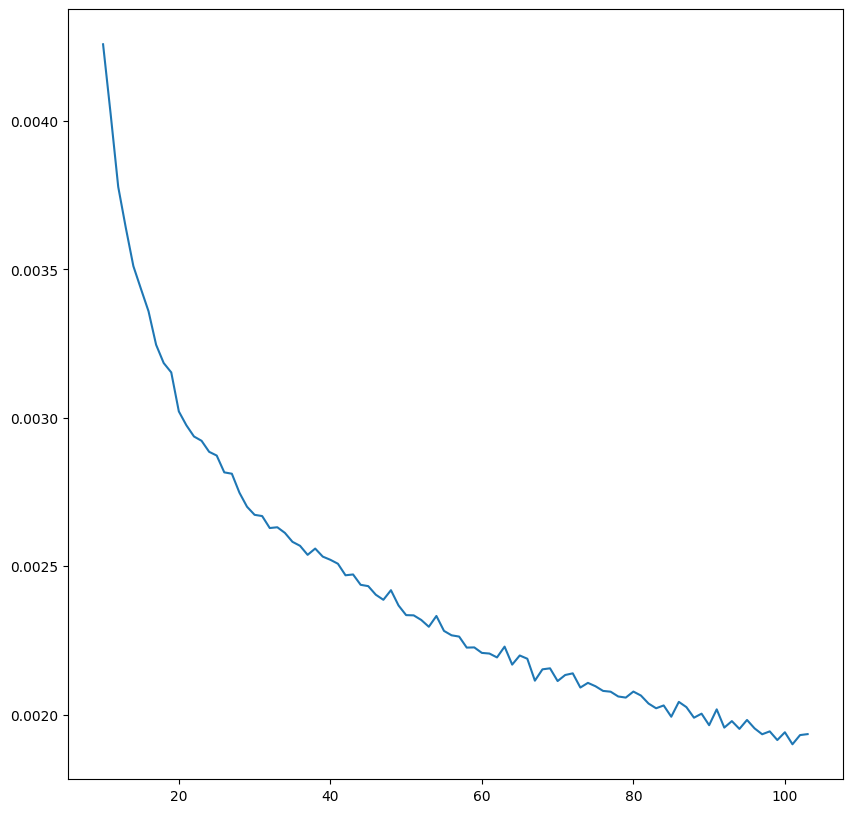

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.plot([x for x in range(10, len(history.history['mse']))], history.history['mse'][10:])

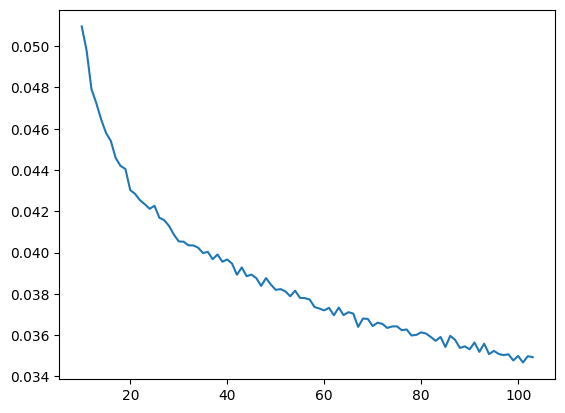

In [17]:
plt.plot([x for x in range(10, len(history.history['mae']))], history.history['mae'][10:])

In [19]:
mae = np.sum(abs(Y_scaler.inverse_transform(Y_predict) - Y_test.to_numpy().reshape(-1, 1))) / Y_test.size
mae

np.float64(15.135958757129176)

In [20]:
np.mean(Y_test.to_numpy().reshape(-1, 1)), np.max(Y_test.to_numpy().reshape(-1, 1)), np.min(Y_test.to_numpy().reshape(-1, 1))

(np.float64(200.66472791640763),
 np.float64(437.0324821081598),
 np.float64(44.00094898495299))

In [21]:
np.mean(Y_scaler.inverse_transform(Y_predict)), np.max(Y_scaler.inverse_transform(Y_predict)), np.min(Y_scaler.inverse_transform(Y_predict))

(np.float32(195.56635), np.float32(412.8467), np.float32(48.64017))

(array([ 39.,  98., 159., 197., 219., 159.,  80.,  33.,  11.,   5.]),
 array([0.04884207, 0.13465771, 0.22047333, 0.30628896, 0.3921046 ,
        0.47792023, 0.56373584, 0.64955151, 0.73536712, 0.82118273,
        0.9069984 ]),
 <BarContainer object of 10 artists>)

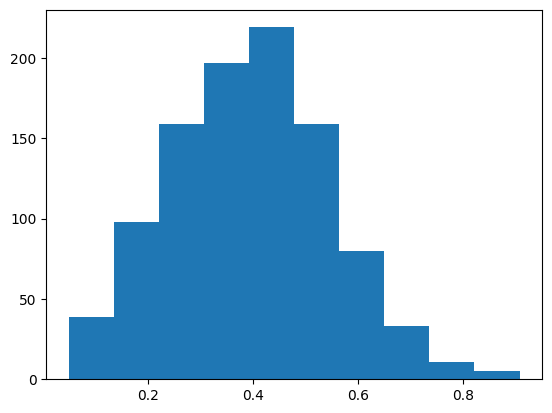

In [22]:
plt.hist(Y_predict)

(array([ 24.,  93., 171., 234., 222., 134.,  78.,  29.,  11.,   4.]),
 array([ 44.00094898,  83.3041023 , 122.60725561, 161.91040892,
        201.21356223, 240.51671555, 279.81986886, 319.12302217,
        358.42617548, 397.7293288 , 437.03248211]),
 <BarContainer object of 10 artists>)

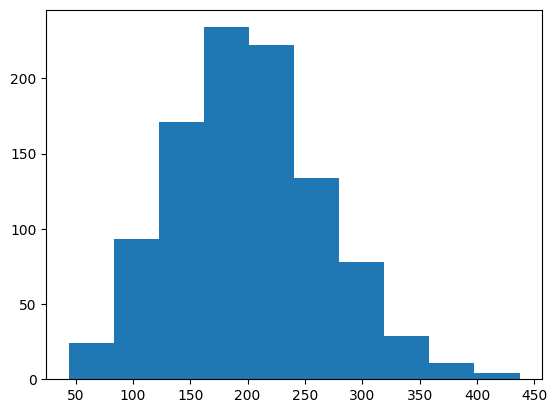

In [23]:
plt.hist(Y_test)

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca_test = PCA(n_components=1)
pca_test.fit(p.transform(X_test))
X_test_pca = pca_test.transform(p.transform(X_test))

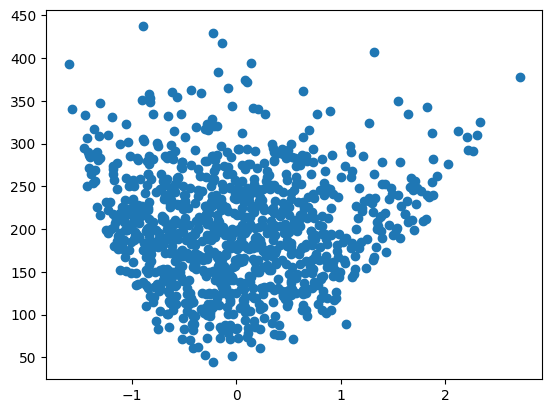

In [26]:
plt.scatter(X_test_pca, Y_test)

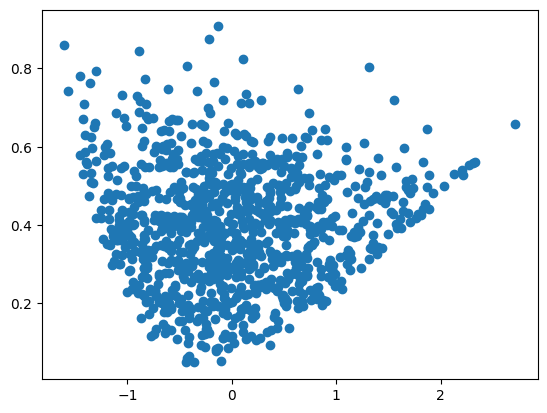

In [27]:
plt.scatter(X_test_pca, Y_predict)

In [28]:
np.sqrt((np.sum((Y_test - np.mean(Y_test))**2) / Y_test.size))

np.float64(65.7460841556499)